In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import statsmodels.api as sm

Reading the file. and transforming the column 'GDP' to make it easy to analyse.

In [2]:
df = pd.read_csv(r'C:\Users\pipec\OneDrive\Documentos\Python Scripts\PROJECT_1\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv')


df.info()

GDP_mil = df['GDP']/1000000

df['GDP'] = GDP_mil

df = df.rename(columns={'GDP': 'GDP (Million of dollars)'})


df.head(5)
print(df.Year.min(),df.Year.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
2000 2015


## Histogram

An Histogram is shown to see the distribution of life expectancy and GDP

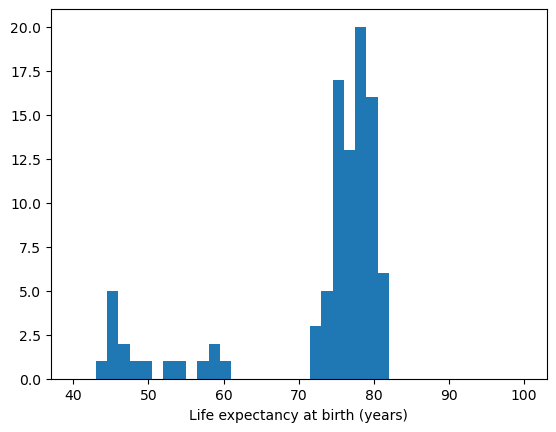

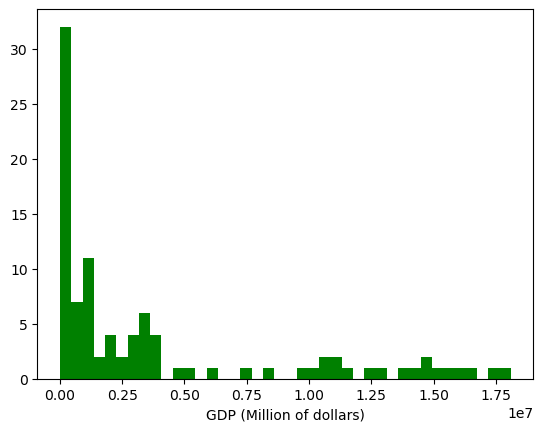

<Figure size 640x480 with 0 Axes>

In [41]:
plt.hist(df['Life expectancy at birth (years)'],range=(40,100),bins=40)
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

plt.hist(df['GDP (Million of dollars)'],bins=40,color='Green')
plt.xlabel('GDP (Million of dollars)')
plt.show()
plt.clf()

## Exploratory analysis

Checking means, variances and general distribution of each country in terms of GDP and Life expectancy

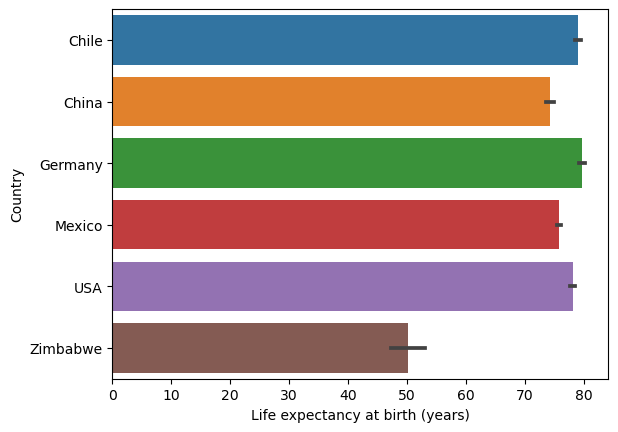

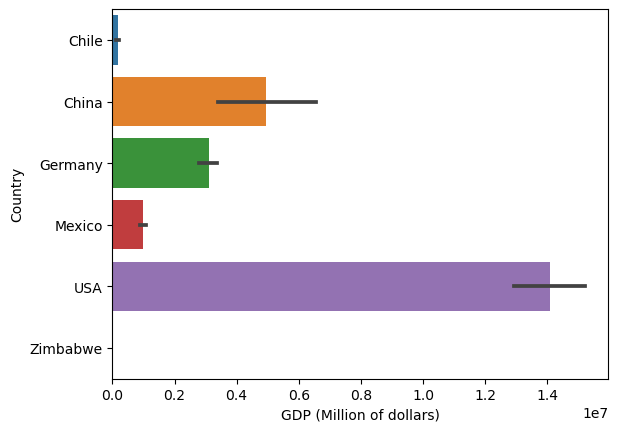

<Figure size 640x480 with 0 Axes>

In [4]:
df['Country'] = df['Country'].replace('United States of America', 'USA')

sns.barplot(x='Life expectancy at birth (years)',y='Country',data=df)
plt.show()
plt.clf()

sns.barplot(x='GDP (Million of dollars)',y='Country',data=df)
plt.show()
plt.clf()




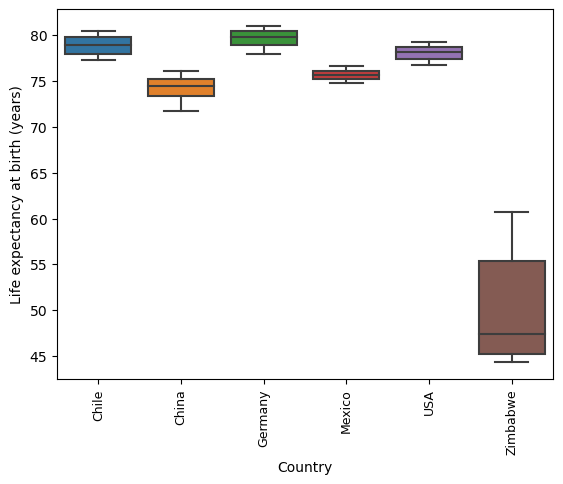

<Figure size 640x480 with 0 Axes>

In [5]:

sns.boxplot(y='Life expectancy at birth (years)',x='Country',data=df)
plt.xticks(rotation=90,fontsize=9)
plt.show()
plt.clf()

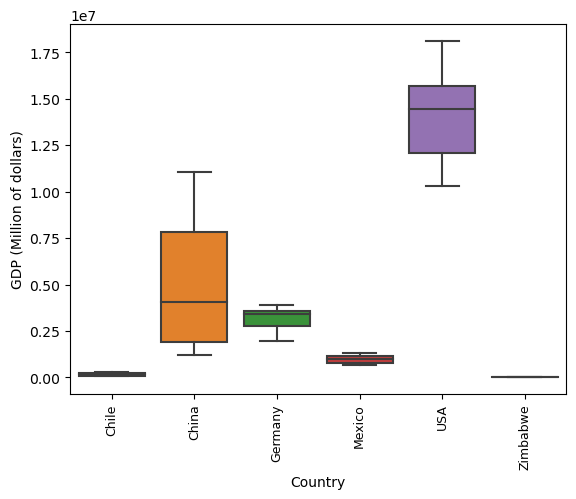

<Figure size 640x480 with 0 Axes>

In [6]:
sns.boxplot(y='GDP (Million of dollars)',x='Country',data=df)
plt.xticks(rotation=90,fontsize=9)
plt.show()
plt.clf()

## Lineal regression between GDP VS LE per country



Analyzing the relation between the both variables in the study (GDP vs LE)
We can see there are strong relations in every country which mean that the more life expectancy the more GDP.

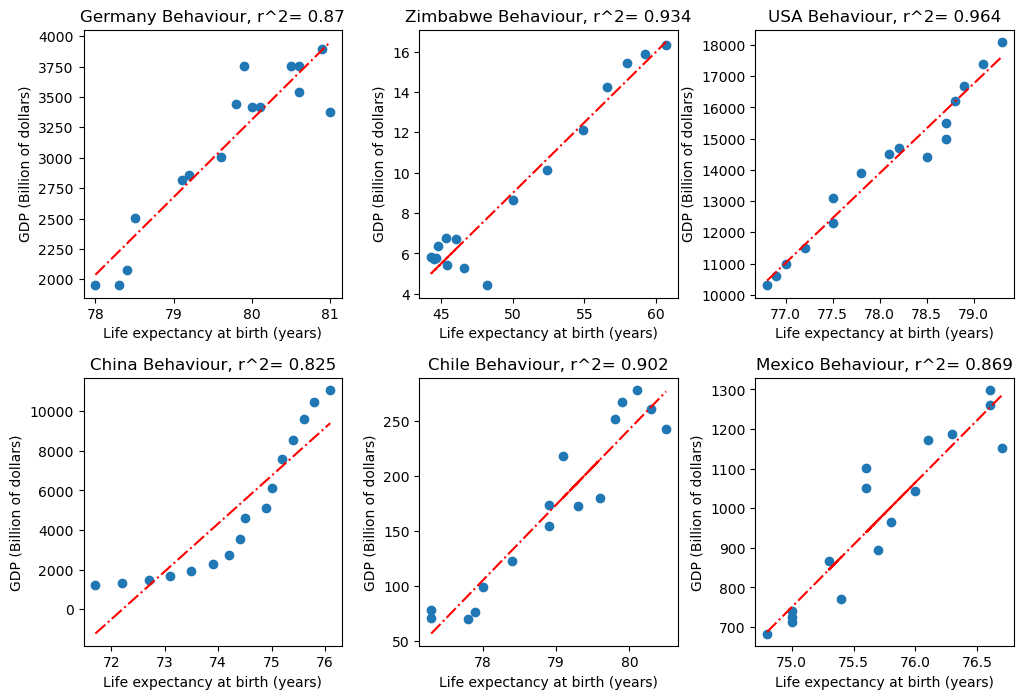

<Figure size 640x480 with 0 Axes>

In [29]:
df_Chile= pd.DataFrame({'Year': df[(df['Country'] == 'Chile')]['Year'],'LE': df[(df['Country'] == 'Chile')]['Life expectancy at birth (years)'],'GDP':df[(df['Country'] == 'Chile')]['GDP (Million of dollars)'] /1000})


countries = list(set(df['Country']))
df_countries = ['df_'+str(i) for i in countries]

plt.figure(figsize=(12,8))
for i,country in enumerate(countries):
    df_countries[i]= pd.DataFrame({'LE': df[(df['Country'] == country)]['Life expectancy at birth (years)'],'GDP':df[(df['Country'] == country)]['GDP (Million of dollars)'] /1000}) 
    plt.subplot(2,3,i+1)
    plt.scatter(df_countries[i]['LE'],df_countries[i]['GDP'])
    plt.xlabel('Life expectancy at birth (years)')
    plt.ylabel('GDP (Billion of dollars)')
    model = sm.OLS.from_formula('GDP~LE',data=df_countries[i])
    results=model.fit()
    plt.title(str(countries[i])+' Behaviour, r^2= '+ str(round(results.rsquared,3)))
    plt.plot(df_countries[i]['LE'], results.predict(df_countries[i]['LE']), color='red', label='Regression line',linestyle='-.')
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()
plt.clf()

## Checking timelines regarding GDP and LE

Life Expectancy shows an upward trend in all countries over time, with the largest change in
Zimbabwe. Life Expectancy in Zimbabwe showed a downward trend until 2004, however it has
increased significantly from 2005 until 2015. 

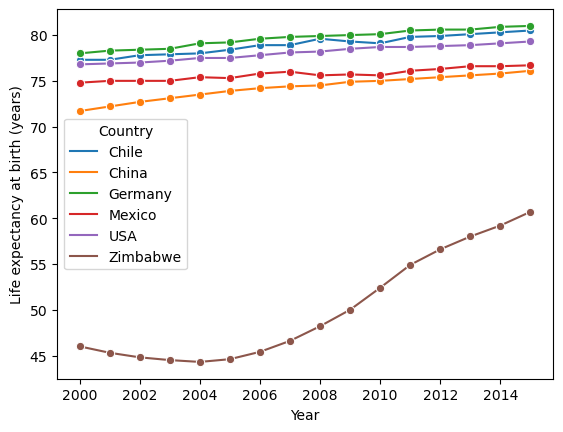

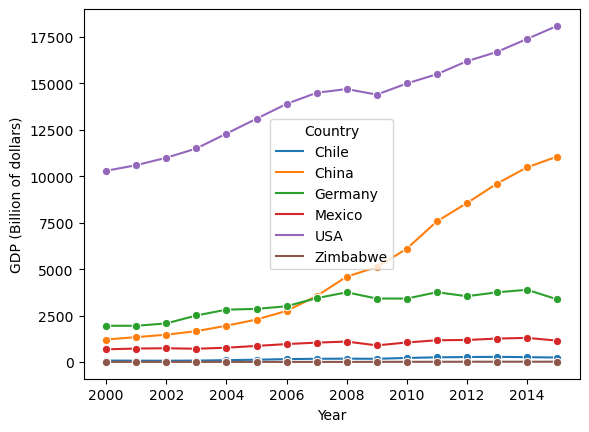

<Figure size 640x480 with 0 Axes>

In [24]:
sns.lineplot(x=df['Year'],y=df['Life expectancy at birth (years)'],hue=df['Country'],marker='o')

plt.show()
plt.clf()

#sns.scatterplot(x=df['Year'],y=df['GDP (Million of dollars)'],hue=df['Country'])
sns.lineplot(x=df['Year'],y=df['GDP (Million of dollars)']/1000,hue=df['Country'],marker='o')
plt.ylabel('GDP (Billion of dollars)')

plt.show()
plt.clf()

## CORRELATION HEATMAP

By calculating the covariance and correlation, we can see there is a clear association between GDP
and Life Expectancy. This is clearer when correlation and covariance are calculated at a country
level, rather than on the dataset as a whole. the reason for this is likely to be due to the large
variance seen between some countries. 

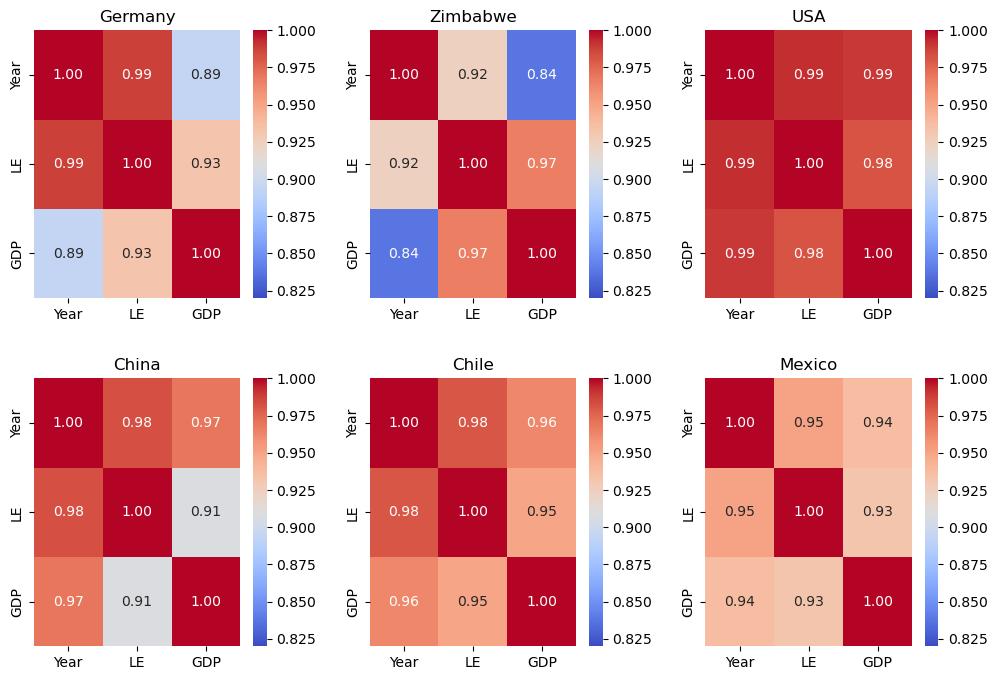

<Figure size 640x480 with 0 Axes>

In [ ]:



plt.figure(figsize=(12,8))
for i,country in enumerate(countries):
    df_countries[i]= pd.DataFrame({'Year': df[(df['Country'] == country)]['Year'],'LE': df[(df['Country'] == country)]['Life expectancy at birth (years)'],'GDP':df[(df['Country'] == country)]['GDP (Million of dollars)'] /1000}) 
    corr_matrix=df_countries[i].corr()
    plt.subplot(2,3,i+1)
    sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',vmin=0.82,vmax=1)

    plt.title(str(countries[i]))

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()
plt.clf()



## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.